### Step 0

In [ ]:
# CodeGrade step0

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

### Step 1

In [ ]:
# CodeGrade step0

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [ ]:
# Look at it
data.info()
print(data)

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...  

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


Text(0.5, 1.0, 'Distribution of Targets')

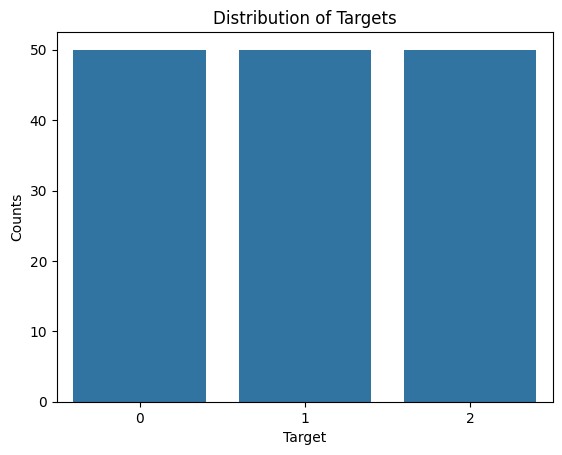

In [ ]:
# Visualize relationships
target_counts = data['target'].value_counts()

X = target_counts.index
y = target_counts.values

sns.barplot(x=X, y=y)
plt.xlabel('Target')
plt.ylabel('Counts')
plt.title('Distribution of Targets')

In [ ]:
# CodeGrade step1

# Encode target variable as categorical
# data = pd.get_dummies(data, drop_first=True)
# print(data)

# Separate features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Step 2

In [ ]:
# CodeGrade step0

# Train the SVM Model
# Initialize the SVM classifier with an RBF kernel
svc_model = SVC(kernel='rbf', C=1, probability=True)

# Train the model
svc_model.fit(X_train, y_train)

SVC(C=1, probability=True)

In [ ]:
# CodeGrade step2

# Predict on the test data
y_pred = svc_model.predict(X_test)
y_pred_proba = svc_model.predict_proba(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Step 3


In [ ]:
# CodeGrade step3

# Classification report and confusion matrix


print("Confusion matrix:")
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Classification Report
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Step 4

In [ ]:
# CodeGrade step0

# Optimize the Model
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
# CodeGrade step4

# Grid Search Best
grid_search.best_params_
print(f"Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### Step 5

In [ ]:
# CodeGrade step0

# Train the optimized model
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [ ]:
# CodeGrade step5

# Get predicted probabilities for the positive class (class 1)
y_test_binary = (y_test == 1).astype(int)
y_pred_proba = optimized_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, threshold = roc_curve(y_test_binary, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)


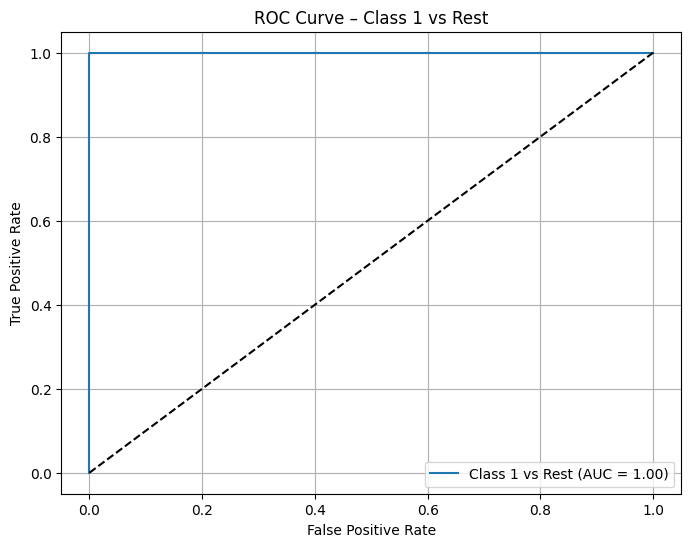

In [ ]:
# Plot the ROC curve
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Class 1 vs Rest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Class 1 vs Rest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()